**Image Emotion Recognition With DeepFace(for deep learning models implementation)-Pre-trained models**

In [1]:
import cv2

In [2]:
from deepface import DeepFace

In [3]:
img=cv2.imread('happy.jpg')

In [4]:
import matplotlib.pyplot as plt

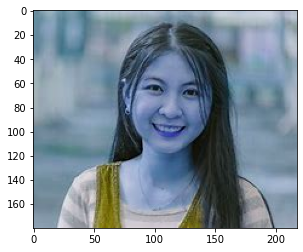

In [5]:
plt.imshow(img)

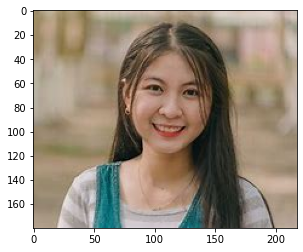

In [6]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
predictions=DeepFace.analyze(img)

In [ ]:
predictions

In [ ]:
type(predictions)

In [ ]:
predictions['dominant_emotion']

**Drawing a Rectangle Across the Face**

In [ ]:
faceCascade= cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

In [ ]:
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces=faceCascade.detectMultiScale(gray,1.1,4)

# Draw a rectangle around the faces
for(x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
font =cv2.FONT_HERSHEY_SIMPLEX

# Use putText() method for
# inserting text on video
cv2.putText(img,
           predictions['dominant_emotion'],
           (0,50),
           font,1,
           (0,0,255),
           2,
           cv2.LINE_4);

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
img=cv2.imread('neutral.jpg')

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
predictions=DeepFace.analyze(img)

In [ ]:
predictions

In [ ]:
predictions['dominant_emotion']

In [ ]:
img=cv2.imread('sad.jpg')

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
predictions=DeepFace.analyze(img)

In [ ]:
predictions

In [ ]:
predictions['dominant_emotion']

**Face Emotion Recognition with Transfer Learning**

In [26]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [27]:
img_array=cv2.imread(r'C:\Users\HP\Desktop\FINAL PROJECT\Training\0\Training_3908.jpg')

In [28]:
print(img_array)

[[[163 163 163]
  [128 128 128]
  [114 114 114]
  ...
  [139 139 139]
  [141 141 141]
  [134 134 134]]

 [[147 147 147]
  [114 114 114]
  [102 102 102]
  ...
  [142 142 142]
  [138 138 138]
  [138 138 138]]

 [[112 112 112]
  [106 106 106]
  [ 92  92  92]
  ...
  [140 140 140]
  [141 141 141]
  [134 134 134]]

 ...

 [[139 139 139]
  [141 141 141]
  [136 136 136]
  ...
  [154 154 154]
  [171 171 171]
  [191 191 191]]

 [[140 140 140]
  [133 133 133]
  [120 120 120]
  ...
  [138 138 138]
  [146 146 146]
  [158 158 158]]

 [[136 136 136]
  [134 134 134]
  [113 113 113]
  ...
  [146 146 146]
  [144 144 144]
  [144 144 144]]]


In [29]:
img_array.shape

(48, 48, 3)

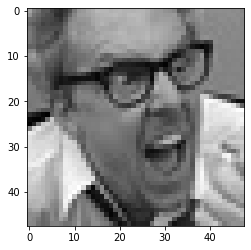

In [30]:
plt.imshow(img_array)

In [31]:
Datadirectory="Training/" # training dataset

In [32]:
Classes=["0","1","2","3","4","5","6"] ## list of classes

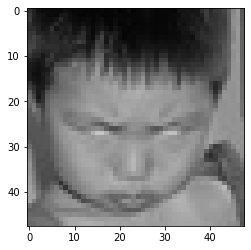

In [33]:
for category in Classes:
    path=os.path.join(Datadirectory,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break   

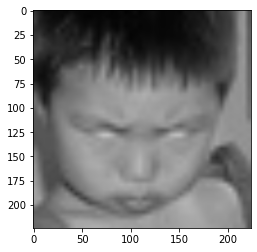

In [34]:
img_size=224 ## imagenet=>224 X 224
new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))

In [35]:
new_array.shape

(224, 224, 3)

In [36]:
#read all the images and convert them into array
training_Data=[] ##data array

def create_training_Data():
    for category in Classes:
        path=os.path.join(Datadirectory,category)
        class_num=Classes.index(category) ##0 1, ##Label
    for img in os.listdir(path):
        try:
            img_array=cv2.imread(os.path.join(path,img))
            new_array=cv2.resize(img_array,(img_size,img_size))
            training_Data.append([new_array,class_num])
        except Exception as e:
            pass   
    

In [37]:
create_training_Data()

In [38]:
print(len(training_Data))

3171


In [39]:
temp=np.array(training_Data)

In [40]:
temp.shape

(3171, 2)

In [41]:
import random
random.shuffle(training_Data)

In [42]:
X=[] ##data/feature
y=[] ##Label
for features,label in training_Data:
    X.append(features)
    y.append(label)
    
X=np.array(X).reshape(-1,img_size,img_size,3)  ##converting it to 4 dimension  

In [43]:
X.shape

(3171, 224, 224, 3)

In [44]:
#normalise the data
X=X/255.0; 

In [45]:
type(y)

list

In [46]:
y[0] 

6

In [47]:
Y=np.array(y)

In [48]:
Y.shape

(3171,)

**Deep learning model for training-Transfer Learning**

In [49]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [50]:
model=tf.keras.applications.MobileNetV2() ##pre-trained model

In [51]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [52]:
#transfer learnig- tuning,weights will start from last check point
base_input=model.layers[0].input

In [53]:
base_output=model.layers[-2].output

In [54]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [55]:
final_output=layers.Dense(128)(base_output)  ##adding new layer , after the output of global pooling layer
final_output=layers.Activation('relu')(final_output)  ## activation function
final_output=layers.Dense(64)(final_output)
final_output=layers.Activation('relu')(final_output)
final_output=layers.Dense(7,activation='sigmoid')(final_output)  ## myclasses are 07

In [56]:
final_output ##output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_5')>

In [57]:
new_model=keras.Model(inputs=base_input,outputs=final_output)

In [58]:
new_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                           

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [59]:
new_model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [61]:
new_model.save('trained_model.h5')

In [ ]:
new_model=tf.keras.models.load_model('trained_model.h5')

**Testing the Model**

In [ ]:
frame=cv2.imread('surprise.jpg')

In [ ]:
frame.shape

In [ ]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [ ]:
#face detection algorithm(gray image)
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+"haarcascade_frontalface_default.xml")

In [ ]:
gray=cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)

In [ ]:
faces=faceCascade.detectMultiScale(gray,1.1,4)
for(x,y,w,h) in faces:
    roi_gray=gray[y:y+h,x:x+w]
    roi_color=frame[y:y+h,x:x+w]
    cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
    facess=faceCascade.detectMultiScale(roi_gray)
    if(len(faces)==0):
        print("Face not detected")
    else:
        for(ex,ey,ew,eh)in facess:
            face_roi=roi_color[ey:ey+eh,ex:ex+ew]

In [ ]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [ ]:
plt.imshow(cv2.cvtColor(face_roi,cv2.COLOR_BGR2RGB))

In [ ]:
final_image=cv2.resize(face_roi,(224,224))
final_image=np.expand_dims(final_image,axis=0) ##need fourth dimension
final_image=final_image/255.0 ## normalising

In [ ]:
Predictions=new_model.predict(final_image)

In [ ]:
Predictions[0]

In [ ]:
np.argmax(Predictions)

**Model Accuracy**

In [ ]:
loss, acc = new_model.evaluate(X, Y)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

**Real-Time-Face-Emotion-Recognition**

NameError: name 'np' is not defined